In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
from sklearn import linear_model
df = pd.read_csv('PoultryFarmSurveyDataset.csv', encoding= 'unicode_escape')
df.head()

,Timestamp,Farm Name,Farm Type,Farm Purpose,Farm size,\nType of Egg Tray Used,Temperature,Shed Sanitration Period,Feeder Used,Disease,Infected Bird per month,Death Bird per month,Average Weight,Farm Production,Annual Income
0,4/13/2023 9:40:16,"Ideal farm,narlapadav",Boiler,Meat,4000,None,19,40.0,Ideal feeds,coughing,55,30,1.5,No,360000
1,4/13/2023 10:21:51,Dsourza farm,Boiler,Meat,2000,None,14,42.0,Bharath feeds,grasping of air,290,250,2.0,No,150000
2,4/13/2023 10:59:35,Iruvail Barke farm,Boiler,Meat,6000,None,21,60.0,Bharath feeds,Avian influenza,30,24,2.0,No,168000
3,4/13/2023 11:45:25,Dhiraj farm,Boiler,Meat,3500,None,13,60.0,Bharath feeds,Avian influenza,40,25,1.8,No,120000
4,4/13/2023 11:57:40,Joseph chicken farm,Boiler,Meat,4600,None,16,50.0,Bharath feeds,Fowl pox,500,406,2.3,No,108000


In [2]:
df.shape

(100, 15)

In [3]:
df_dub = df.copy()
df_dub.drop_duplicates(subset=None, inplace=True)

In [4]:
df.shape

(100, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                100 non-null    object 
 1   Farm Name                100 non-null    object 
 2   Farm Type                100 non-null    object 
 3   Farm Purpose             100 non-null    object 
 4   Farm size                100 non-null    int64  
 5   
Type of Egg Tray Used   100 non-null    object 
 6   Temperature              100 non-null    object 
 7   Shed Sanitration Period  100 non-null    float64
 8   Feeder Used              100 non-null    object 
 9   Disease                  100 non-null    object 
 10  Infected Bird per month  100 non-null    int64  
 11  Death Bird per month     100 non-null    int64  
 12  Average Weight           100 non-null    float64
 13  Farm Production          100 non-null    object 
 14  Annual Income            10

In [6]:
(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)

0.0    15
dtype: int64

In [7]:
(df.isnull().sum(axis=1) * 100 / len(df)).value_counts(ascending=False)

0.0    100
dtype: int64

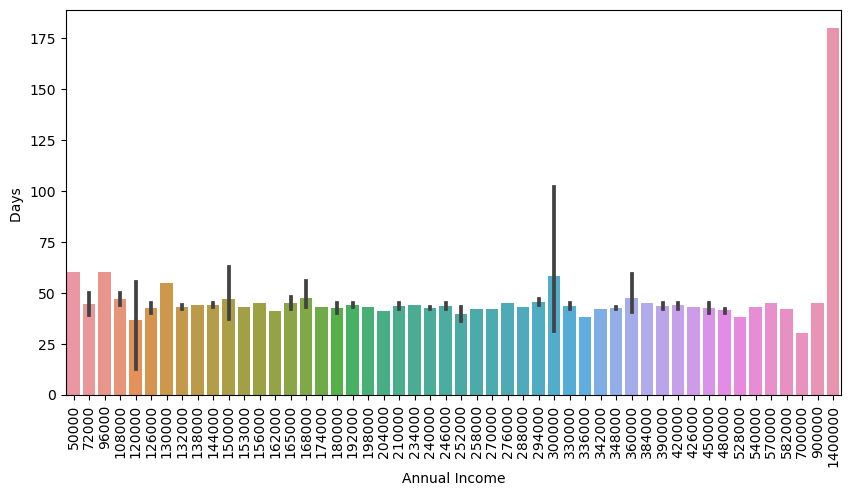

In [8]:
#Days with Annual Income
plt.figure(figsize = (10,5))
dai= df[['Shed Sanitration Period','Annual Income']].sort_values('Annual Income', ascending = False)
ax = sns.barplot(x='Annual Income', y='Shed Sanitration Period', data= dai)
ax.set(xlabel = 'Annual Income', ylabel= 'Days ')
plt.xticks(rotation=90)
plt.show()

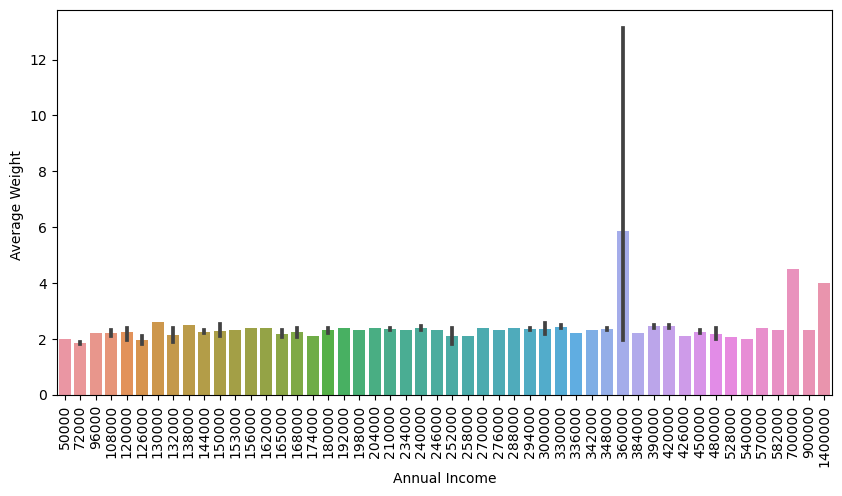

In [9]:
#weight with Annual Income
plt.figure(figsize = (10,5))
dawi= df[['Average Weight','Annual Income']].sort_values('Annual Income', ascending = False)
ax = sns.barplot(x='Annual Income', y='Average Weight', data= dawi)
ax.set(xlabel = 'Annual Income', ylabel= 'Average Weight ')
plt.xticks(rotation=90)
plt.show()

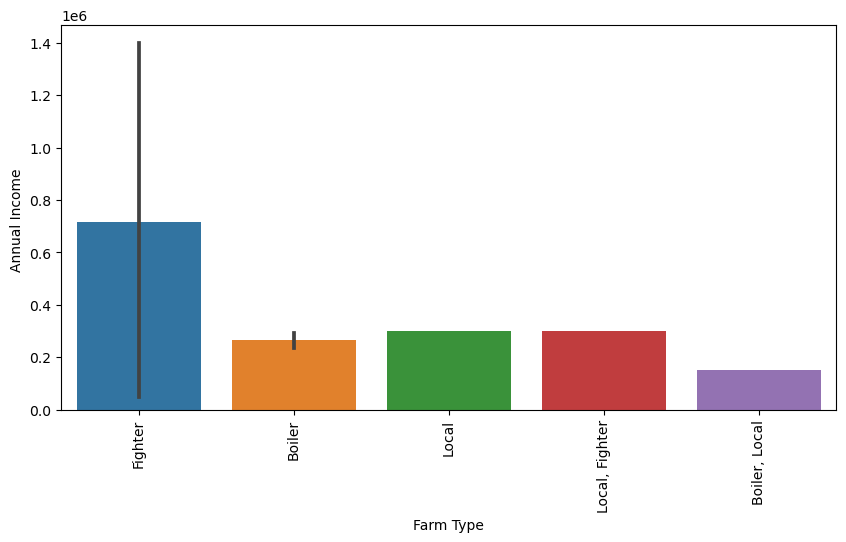

In [10]:
#Farm type with Annual Income
plt.figure(figsize = (10,5))
dfai= df[['Farm Type','Annual Income']].sort_values('Annual Income', ascending = False)
ax = sns.barplot(x='Farm Type', y='Annual Income', data= dfai)
ax.set(xlabel = 'Farm Type', ylabel= 'Annual Income ')
plt.xticks(rotation=90)
plt.show()

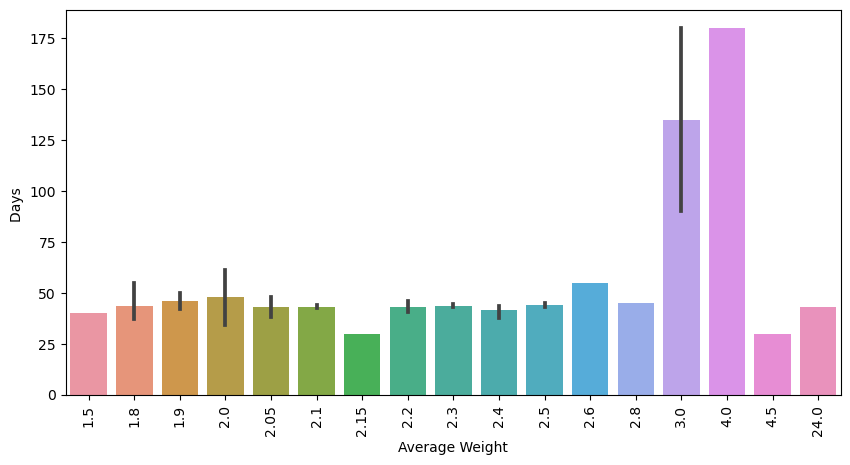

In [11]:
#Days with weight
plt.figure(figsize = (10,5))
daw= df[['Shed Sanitration Period','Average Weight']].sort_values('Average Weight', ascending = False)
ax = sns.barplot(x='Average Weight', y='Shed Sanitration Period', data= daw)
ax.set(xlabel = 'Average Weight', ylabel= 'Days ')
plt.xticks(rotation=90)
plt.show()

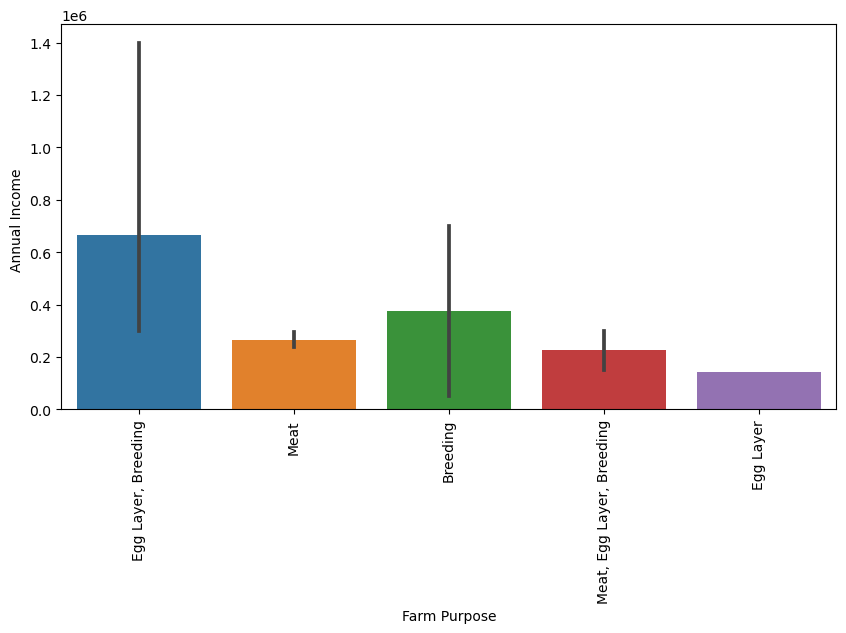

In [12]:
#Farm Purpose with Annual Income
plt.figure(figsize = (10,5))
dfp= df[['Farm Purpose','Annual Income']].sort_values('Annual Income', ascending = False)
ax = sns.barplot(x ='Farm Purpose', y ='Annual Income', data= dfp)
ax.set(xlabel = 'Farm Purpose', ylabel= 'Annual Income ')
plt.xticks(rotation=90)
plt.show()

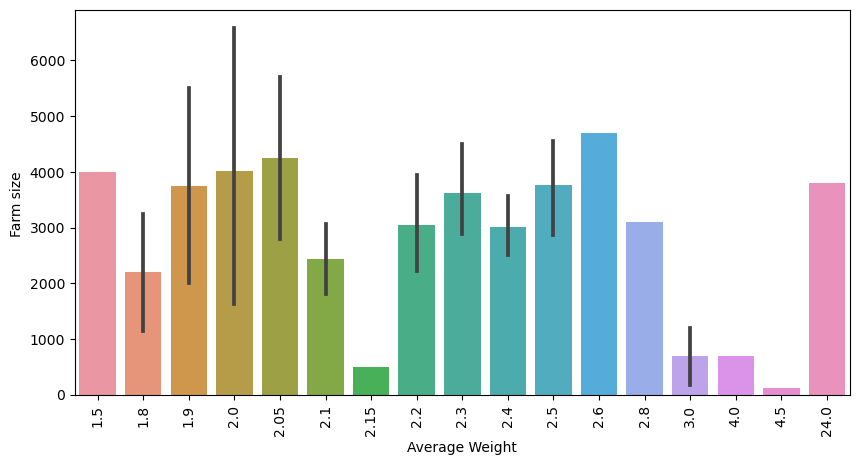

In [13]:
#Farm Size with Average Weight
plt.figure(figsize = (10,5))
dfp= df[['Farm size','Average Weight']].sort_values('Average Weight', ascending = False)
ax = sns.barplot(x ='Average Weight', y ='Farm size', data= dfp)
ax.set(xlabel = 'Average Weight', ylabel= 'Farm size ')
plt.xticks(rotation=90)
plt.show()

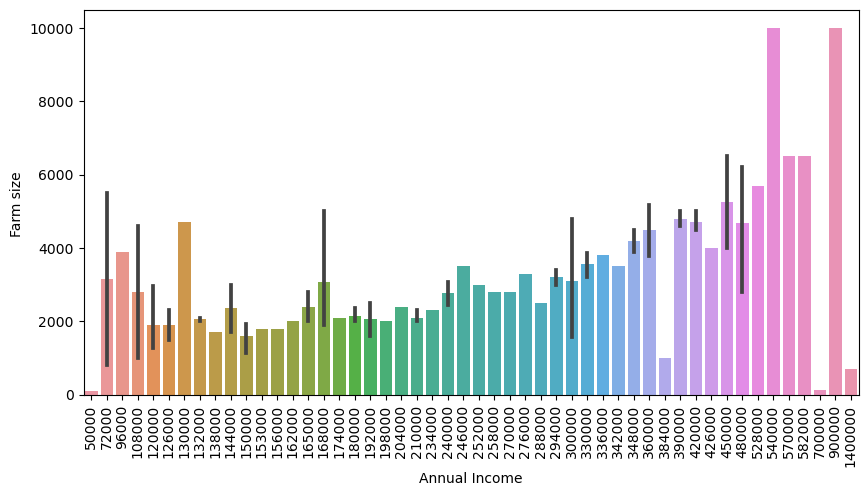

In [14]:
#Farm Size with Annual Income
plt.figure(figsize = (10,5))
dfp= df[['Farm size','Annual Income']].sort_values('Annual Income', ascending = False)
ax = sns.barplot(x ='Annual Income', y ='Farm size', data= dfp)
ax.set(xlabel = 'Annual Income', ylabel= 'Farm size ')
plt.xticks(rotation=90)
plt.show()

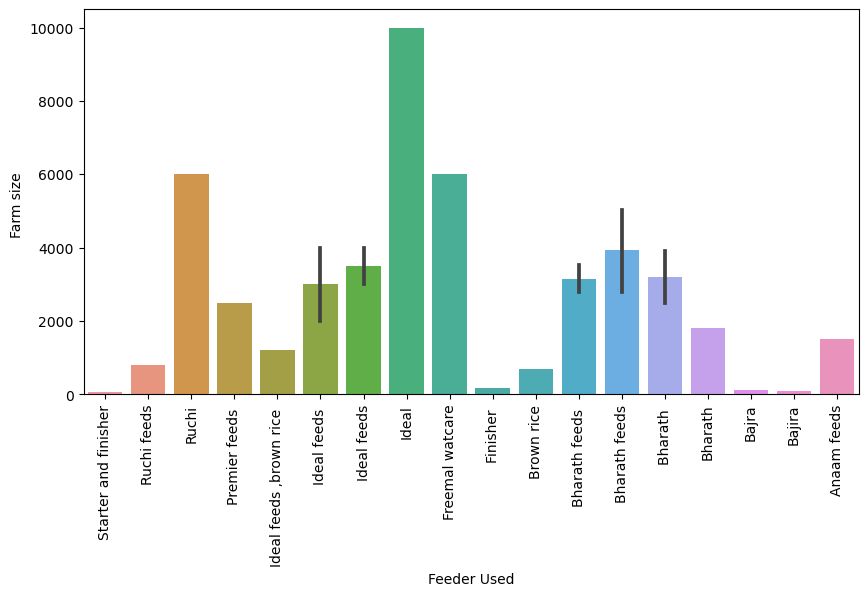

In [15]:
#Farm Size with Freeder Used
plt.figure(figsize = (10,5))
dfp= df[['Farm size','Feeder Used']].sort_values('Feeder Used', ascending = False)
ax = sns.barplot(x ='Feeder Used', y ='Farm size', data= dfp)
ax.set(xlabel = 'Feeder Used', ylabel= 'Farm size ')
plt.xticks(rotation=90)
plt.show()

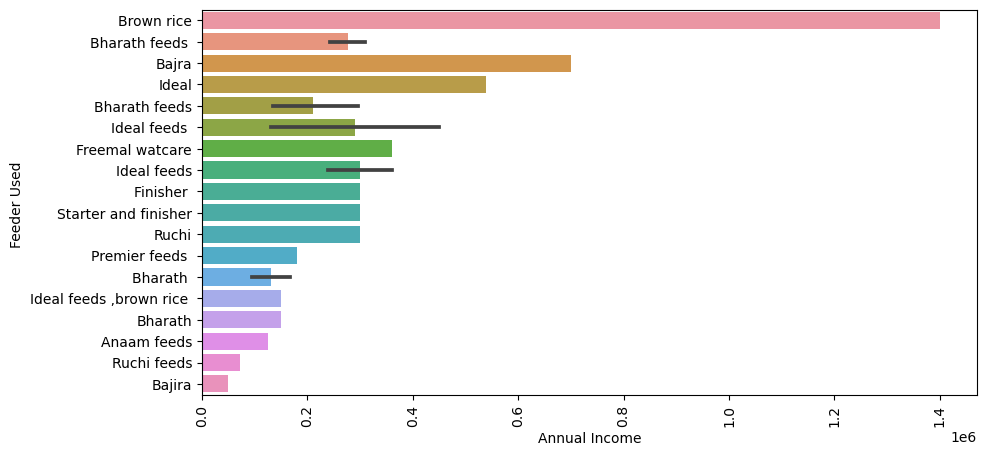

In [16]:
#Freeder Used with Annual Income
plt.figure(figsize = (10,5))
dfp= df[['Feeder Used','Annual Income']].sort_values('Annual Income', ascending = False)
ax = sns.barplot(x ='Annual Income', y ='Feeder Used', data= dfp)
ax.set(xlabel = 'Annual Income', ylabel= 'Feeder Used ')
plt.xticks(rotation=90)
plt.show()

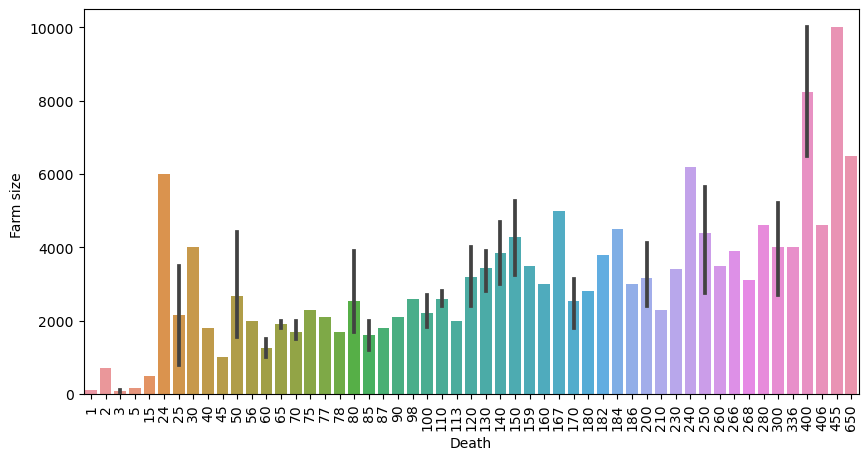

In [17]:
#Farm Size with Death
plt.figure(figsize = (10,5))
dfp= df[['Farm size','Death Bird per month']].sort_values('Death Bird per month', ascending = False)
ax = sns.barplot(x ='Death Bird per month', y ='Farm size', data= dfp)
ax.set(xlabel = 'Death', ylabel= 'Farm size ')
plt.xticks(rotation=90)
plt.show()

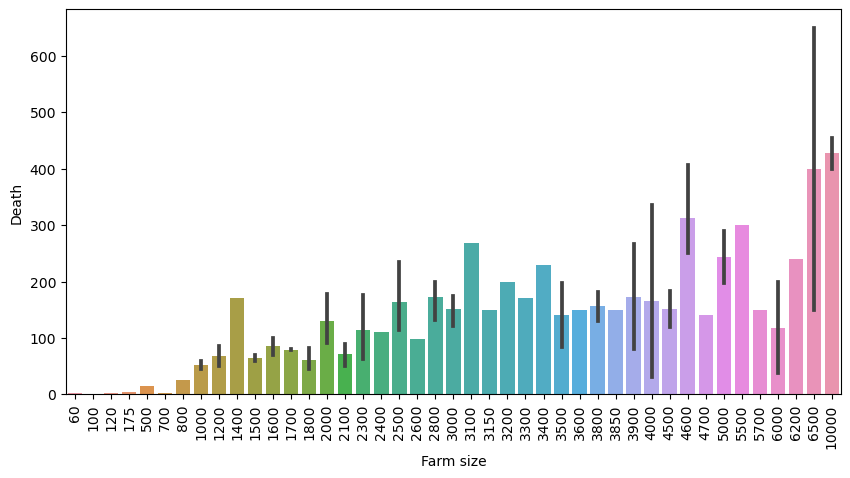

In [18]:
#Death with Annual Income
plt.figure(figsize = (10,5))
dfp= df[['Death Bird per month','Farm size']].sort_values('Death Bird per month', ascending = False)
ax = sns.barplot(x ='Farm size', y ='Death Bird per month', data= dfp)
ax.set(xlabel = 'Farm size', ylabel= 'Death')

plt.xticks(rotation=90)
plt.show()

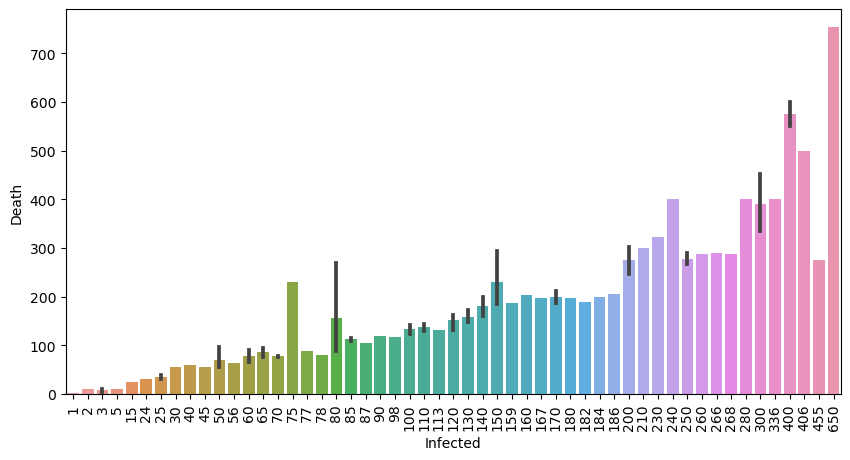

In [19]:
#Death with Infected Birds
plt.figure(figsize = (10,5))
dfp= df[['Infected Bird per month','Death Bird per month']].sort_values('Infected Bird per month', ascending = False)
ax = sns.barplot(x ='Death Bird per month', y ='Infected Bird per month', data= dfp)
ax.set(xlabel = 'Infected', ylabel= 'Death')
plt.xticks(rotation=90)
plt.show()

In [20]:
df.head()

,Timestamp,Farm Name,Farm Type,Farm Purpose,Farm size,\nType of Egg Tray Used,Temperature,Shed Sanitration Period,Feeder Used,Disease,Infected Bird per month,Death Bird per month,Average Weight,Farm Production,Annual Income
0,4/13/2023 9:40:16,"Ideal farm,narlapadav",Boiler,Meat,4000,None,19,40.0,Ideal feeds,coughing,55,30,1.5,No,360000
1,4/13/2023 10:21:51,Dsourza farm,Boiler,Meat,2000,None,14,42.0,Bharath feeds,grasping of air,290,250,2.0,No,150000
2,4/13/2023 10:59:35,Iruvail Barke farm,Boiler,Meat,6000,None,21,60.0,Bharath feeds,Avian influenza,30,24,2.0,No,168000
3,4/13/2023 11:45:25,Dhiraj farm,Boiler,Meat,3500,None,13,60.0,Bharath feeds,Avian influenza,40,25,1.8,No,120000
4,4/13/2023 11:57:40,Joseph chicken farm,Boiler,Meat,4600,None,16,50.0,Bharath feeds,Fowl pox,500,406,2.3,No,108000


In [21]:
X = df[['Shed Sanitration Period', 'Average Weight']]
y = df['Annual Income']

regr = linear_model.LinearRegression()
regr.fit(X.values, y.values)

predictedAI = regr.predict([[40,2.3 ]])

print("Income based on Days and Average Weight",predictedAI)

Income based on Days and Average Weight [256349.65911911]


In [22]:
a = df[['Infected Bird per month', 'Death Bird per month']]
b = df['Annual Income']

regr = linear_model.LinearRegression()
regr.fit(a.values, b.values)

predictedFF= regr.predict([[500,405 ]])

print("Income based on Infected Bird per batch and Death Bird per Batch",predictedFF)

Income based on Infected Bird per batch and Death Bird per Batch [404642.38806707]


In [23]:
c = df[['Farm size', 'Shed Sanitration Period']]
d = df['Average Weight']

regr = linear_model.LinearRegression()
regr.fit(c.values, d.values)

predictedFS= regr.predict([[4000,40 ]])

print("Average Weight based on farm size and Days",predictedFS)

Average Weight based on farm size and Days [2.50104495]


In [24]:
e = df[['Farm size', 'Shed Sanitration Period']]
f = df['Annual Income']

regr = linear_model.LinearRegression()
regr.fit(e.values, f.values)

predictedAA= regr.predict([[4000,40 ]])

print("Income based on farm size and Days",predictedAA)

Income based on farm size and Days [294245.21933713]


In [25]:
g = df[['Farm size', 'Shed Sanitration Period']]
h = df['Death Bird per month']

regr = linear_model.LinearRegression()
regr.fit(g.values, h.values)

predictedAD= regr.predict([[4000,40 ]])

print("Death per batch",predictedAD)

Death per batch [185.98533783]


In [26]:
def predict_income(days, weight):
    X = df[['Shed Sanitration Period', 'Average Weight']]
    y = df['Annual Income']
    regr = linear_model.LinearRegression()
    regr.fit(X.values, y.values)
    predicted_income = regr.predict([[days, weight]])
    return predicted_income[0]

In [27]:
def predict_income_infected_death(infected, death):
    X = df[['Infected Bird per month', 'Death Bird per month']]
    y = df['Annual Income']
    regr = linear_model.LinearRegression()
    regr.fit(X.values, y.values)
    predicted_income = regr.predict([[infected, death]])
    return predicted_income[0]

In [28]:
def user_interface():
    print("Welcome to the Poultry Farm Survey Data Analysis Tool!")
    print("Please enter the following details to get predictions:")

    # Get user inputs
    days = float(input("Enter the shed sanitization period in days: "))
    weight = float(input("Enter the average weight: "))
    infected = float(input("Enter the number of infected birds per month: "))
    death = float(input("Enter the number of death birds per month: "))

    # Predict income based on days and average weight
    predicted_income = predict_income(days, weight)
    print("Income based on days and average weight: ", round(predicted_income, 2))

    # Predict income based on infected bird per batch and death bird per batch
    predicted_income_infected_death = predict_income_infected_death(infected, death)
    print("Income based on infected bird per batch and death bird per batch: ", round(predicted_income_infected_death, 2))

# Run the user interface

In [ ]:
user_interface()

Welcome to the Poultry Farm Survey Data Analysis Tool!
Please enter the following details to get predictions:


In [ ]:
print("Poultry Farm Survey Data Analysis - Predictions")
print("----------------------------------------------")

while True:
    print("\nPlease select an option:")
    print("1. Predict Income based on Days and Average Weight")
    print("2. Predict Income based on Infected Bird per batch and Death Bird per batch")
    print("3. Predict Average Weight based on Farm Size and Days")
    print("4. Predict Income based on Farm Size and Days")
    print("5. Predict Death per batch based on Farm Size and Days")
    print("0. Exit")
    
    choice = input("Enter your choice: ")
    
    if choice == '1':
        days = float(input("Enter the number of days: "))
        avg_weight = float(input("Enter the average weight: "))
        predicted_income = predict_income(days, avg_weight)
        print("Predicted Income: ", round(predicted_income, 2))
    elif choice == '2':
        infected_birds = float(input("Enter the number of infected birds per batch: "))
        death_birds = float(input("Enter the number of death birds per batch: "))
        predicted_income = predict_income_infected_death(infected_birds, death_birds)
        print("Predicted Income: ", round(predicted_income, 2))
        
    elif choice == '3':
        farm_size = float(input("Enter the farm size: "))
        days = float(input("Enter the number of days: "))
        predicted_weight = predict_avg_weight(farm_size, days)
        print("Predicted Average Weight: ", round(predicted_weight, 2), "kg")
        
    elif choice == '4':
        farm_size = float(input("Enter the farm size: "))
        days = float(input("Enter the number of days: "))
        predicted_income = predict_income_farm_size(farm_size, days)
        print("Predicted Income: ", round(predicted_income, 2))
        
    elif choice == '5':
        farm_size = float(input("Enter the farm size: "))
        days = float(input("Enter the number of days: "))
        predicted_death = predict_death_per_batch(farm_size, days)
        print("Predicted Death per batch: ", round(predicted_death, 2))
    elif choice == '0':
        print("Exiting the program...")
        break
    
    else:
        print("Invalid choice. Please try again.")
